# Data Cleaning \& Feature Engineering Notebook

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import src.size_review_functions as fxn
import warnings
from matplotlib import cm
%matplotlib inline
sns.set(style="darkgrid")
warnings.simplefilter('ignore')

In [2]:
#getting data
modcloth_data = pd.read_json('data/modcloth_final_data.zip', lines=True)
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


## Cleaning:
Due to string entries on what shoud be numerical data, a function was created to conver these values

### Converting height entries to inches

In [3]:
modcloth_data.height = modcloth_data.height.apply(fxn.convert_feetinches_to_inches)
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [4]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null float64
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.4+ MB


It is evident that there are a lot of features with a lot of null values. But before proceeding with cleaning the null values, checking for duplicates should be done.

In [5]:
modcloth_data.duplicated().value_counts()

False    82413
True       377
dtype: int64

In [6]:
modcloth_data.drop_duplicates(keep = False, inplace= True)

In [7]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76070 non-null float64
bust              11738 non-null object
category          82036 non-null object
cup size          75835 non-null object
fit               82036 non-null object
height            80933 non-null float64
hips              55544 non-null float64
item_id           82036 non-null int64
length            82001 non-null object
quality           81968 non-null float64
review_summary    75343 non-null object
review_text       75343 non-null object
shoe size         27665 non-null float64
shoe width        18435 non-null object
size              82036 non-null int64
user_id           82036 non-null int64
user_name         82036 non-null object
waist             2880 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.9+ MB


***
# Keep

## Plotting Numerical Data

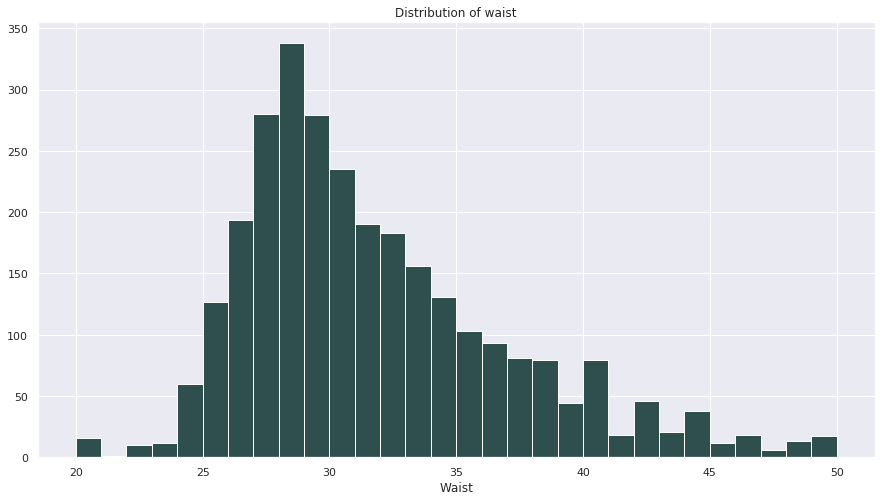

In [8]:
figure = plt.figure(figsize=(15, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['waist'], color="darkslategray",bins=30)
axes.set_title("Distribution of waist")
axes.set_xlabel("Waist")

plt.show()
plt.close()


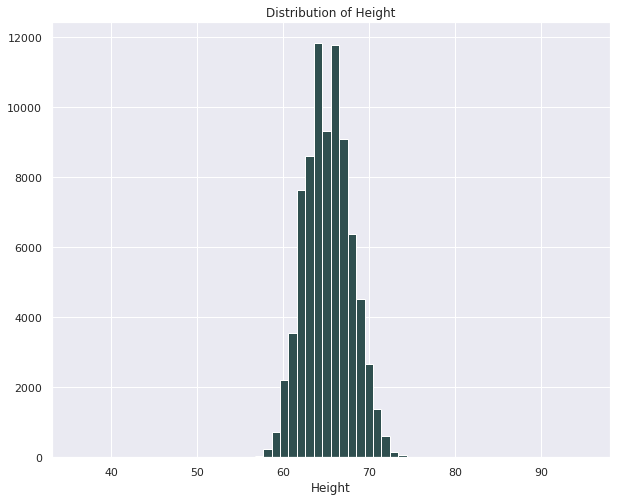

In [9]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['height'], color="darkslategray",bins=60)
axes.set_title("Distribution of Height")
axes.set_xlabel("Height")

plt.show()
plt.close()



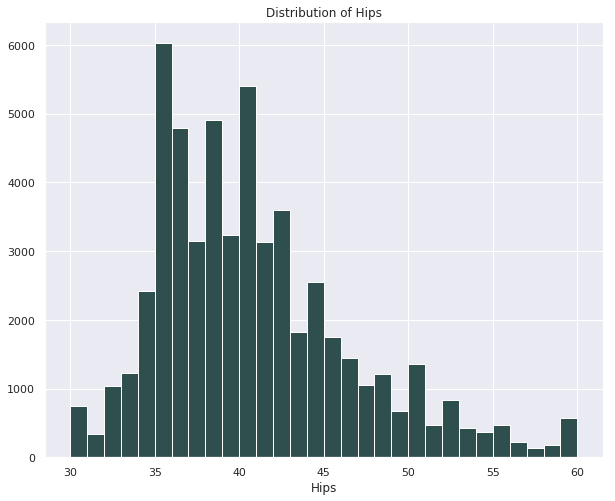

In [10]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['hips'], color="darkslategray",bins=30)
axes.set_title("Distribution of Hips")
axes.set_xlabel("Hips")

plt.show()
plt.close()



# Done keeping
***

Based on the charts and what we deemed unnecessary fatures, we will drop column from the data frame

In [11]:
columns_to_drop_modcloth = [
    'bust','shoe size','shoe width','category','review_summary','review_text','user_name'
]
#create a new data fram to populate missing values  in features where majority are null
modcloth_sub = modcloth_data.drop(columns_to_drop_modcloth, axis = 1)

#Drop unusable and unnecessary features just to keep original dataframe without over filling the null values
modcloth_data.drop(columns_to_drop_modcloth, axis = 1,inplace = True)

modcloth_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 82789
Data columns (total 11 columns):
bra size    76070 non-null float64
cup size    75835 non-null object
fit         82036 non-null object
height      80933 non-null float64
hips        55544 non-null float64
item_id     82036 non-null int64
length      82001 non-null object
quality     81968 non-null float64
size        82036 non-null int64
user_id     82036 non-null int64
waist       2880 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 7.5+ MB


In [12]:
x = list(zip(modcloth_sub.waist,modcloth_sub.hips))
ratios = fxn.hip_waist_ratio(x)
modcloth_sub.waist = pd.Series(i[0] for i in ratios)
modcloth_sub.hips = pd.Series(i[1] for i in ratios)
modcloth_sub.head(10)

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,29.0
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,31.0
2,32.0,b,small,67.0,35.0,123373,slightly long,2.0,7,395665,30.0
3,NaN,dd/e,fit,NaN,NaN,123373,just right,5.0,21,875643,NaN
4,36.0,b,small,62.0,NaN,123373,slightly long,5.0,18,944840,NaN
5,36.0,c,small,64.0,41.0,123373,just right,5.0,11,162012,27.0
6,32.0,b,large,63.0,31.0,123373,just right,1.0,5,114843,26.0
7,38.0,d,small,65.0,42.0,123373,just right,5.0,11,58869,36.0
8,42.0,d,small,70.0,50.0,123373,just right,4.0,30,279568,42.0
9,36.0,dd/e,fit,66.0,41.0,123373,just right,5.0,13,950172,35.0


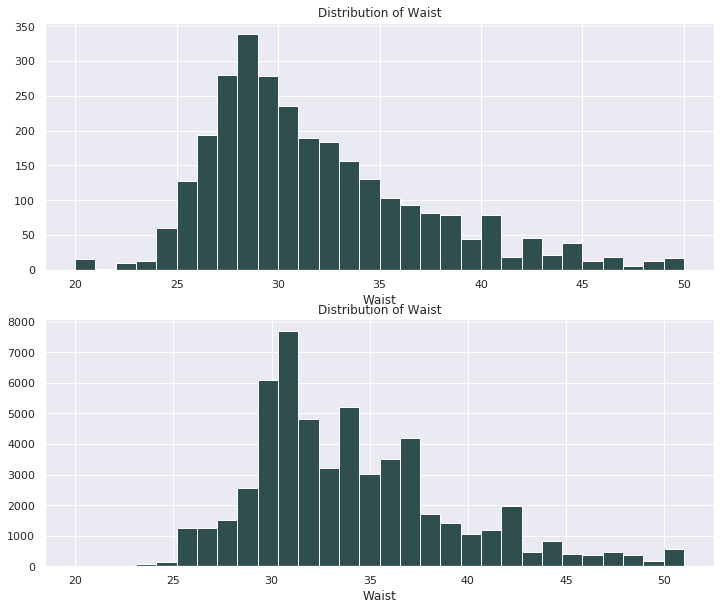

In [13]:
figure = plt.figure(figsize=(12, 10))

axes = figure.add_subplot(2, 1, 1)
axes.hist(modcloth_data['waist'], color="darkslategray",bins=30)
axes.set_title("Distribution of Waist")
axes.set_xlabel("Waist")


axes = figure.add_subplot(2, 1, 2)
axes.hist(modcloth_sub['waist'], color="darkslategray",bins=30)
axes.set_title("Distribution of Waist")
axes.set_xlabel("Waist")

plt.show()
plt.close()



In [14]:
modcloth_waist = modcloth_data[modcloth_data.waist.isnull()==False]
modcloth_waist.head()

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,29.0
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,31.0
2,32.0,b,small,67.0,NaN,123373,slightly long,2.0,7,395665,30.0
5,36.0,c,small,64.0,41.0,123373,just right,5.0,11,162012,27.0
6,32.0,b,large,63.0,NaN,123373,just right,1.0,5,114843,26.0


In [15]:
modcloth_waist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 0 to 82720
Data columns (total 11 columns):
bra size    2633 non-null float64
cup size    2574 non-null object
fit         2880 non-null object
height      2850 non-null float64
hips        2345 non-null float64
item_id     2880 non-null int64
length      2866 non-null object
quality     2841 non-null float64
size        2880 non-null int64
user_id     2880 non-null int64
waist       2880 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 270.0+ KB


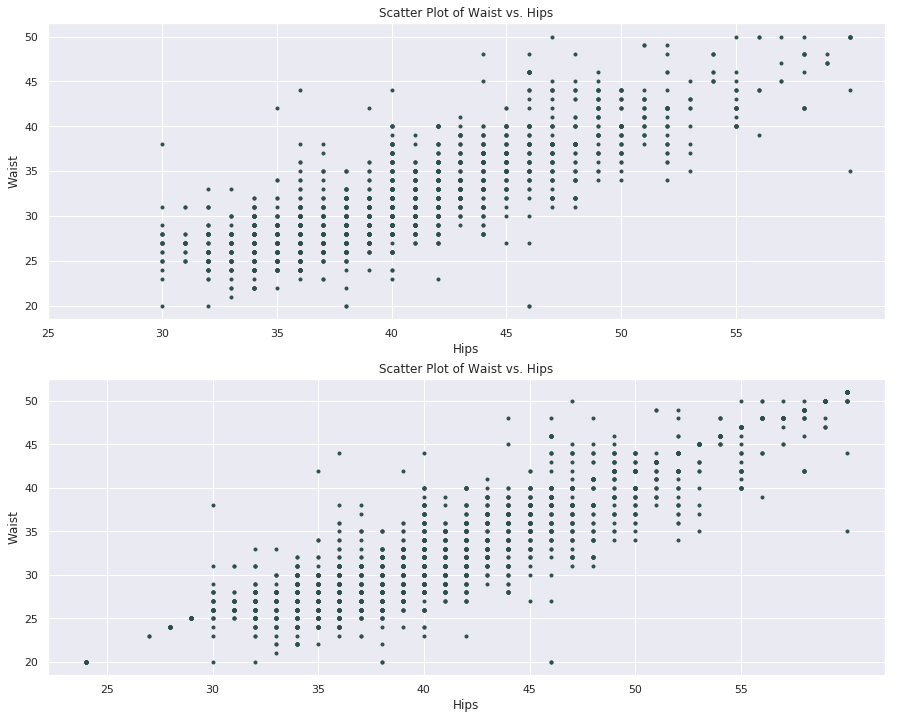

In [16]:
figure = plt.figure(figsize=(15, 12))

axes = figure.add_subplot(2, 1, 1)


axes.scatter(  modcloth_waist['hips'], modcloth_waist['waist'],marker=".", color="darkslategray")
axes.set_ylabel("Waist")
axes.set_xlabel("Hips")
axes.set_xticks(np.arange(25,60,step = 5))
axes.set_title("Scatter Plot of Waist vs. Hips")

axes = figure.add_subplot(2, 1, 2)
axes.scatter(  modcloth_sub['hips'], modcloth_sub['waist'],marker=".", color="darkslategray")
axes.set_xticks(np.arange(25,60,step = 5))
axes.set_ylabel("Waist")
axes.set_xlabel("Hips")
axes.set_title("Scatter Plot of Waist vs. Hips")

plt.show()
plt.close()

In [17]:
x = list(zip(modcloth_waist.waist,modcloth_waist.hips))
ratios = fxn.hip_waist_ratio(x)
modcloth_waist.waist = pd.Series(i[0] for i in ratios)
modcloth_waist.hips = pd.Series(i[1] for i in ratios)
modcloth_waist.head(10)

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,29.0
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,31.0
2,32.0,b,small,67.0,35.0,123373,slightly long,2.0,7,395665,30.0
5,36.0,c,small,64.0,34.0,123373,just right,5.0,11,162012,28.0
6,32.0,b,large,63.0,36.0,123373,just right,1.0,5,114843,31.0
239,34.0,dd/e,fit,65.0,41.0,124761,just right,3.0,7,242643,31.0
299,34.0,c,fit,67.0,40.0,125442,just right,5.0,11,575252,28.0
1066,34.0,a,fit,64.0,38.0,125602,just right,5.0,5,877917,28.0
1067,32.0,b,fit,64.0,40.0,126560,just right,5.0,4,138702,26.0
1068,36.0,c,fit,68.0,51.0,126560,slightly short,3.0,12,534811,44.0


In [18]:
#filling null values
modcloth_waist['hips'].fillna((modcloth_waist['hips'].mean()), inplace=True)
modcloth_waist['waist'].fillna((modcloth_waist['waist'].mean()), inplace=True)

In [19]:
modcloth_waist['hip_waist_ratio'] = modcloth_waist.waist/modcloth_waist.hips
modcloth_sub['hip_waist_ratio'] = modcloth_sub.waist/modcloth_sub.hips

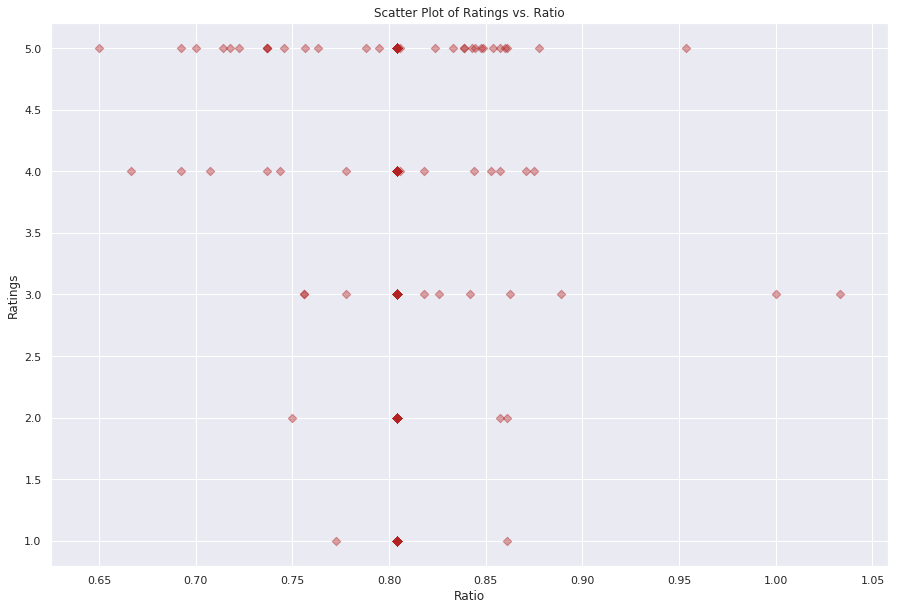

In [55]:
figure = plt.figure(figsize=(15, 10))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(modcloth_waist['hip_waist_ratio'],modcloth_waist['quality'],marker="D", color='firebrick', alpha = .4)
#axes.hexbin(modcloth_waist['hip_waist_ratio'],modcloth_waist['quality'], gridsize=40, cmap=cm.Blues)
axes.set_ylabel("Ratings")
axes.set_xlabel("Ratio")
axes.set_title("Scatter Plot of Ratings vs. Ratio")
#plt.savefig('Rating_vs_Ratio1.png')


plt.show()
plt.close()

In [21]:
high_risk = modcloth_waist[modcloth_waist.hip_waist_ratio>.85]
mod_risk = modcloth_waist[(modcloth_waist.hip_waist_ratio<=.85)&(modcloth_waist.hip_waist_ratio>.8)]
low_risk = modcloth_waist[modcloth_waist.hip_waist_ratio<=.8]

In [22]:
print(low_risk.shape)
print(mod_risk.shape)
print(high_risk.shape)

(25, 12)
(2838, 12)
(17, 12)


In [44]:
stats.normaltest(low_risk.quality, nan_policy='omit')

NormaltestResult(statistic=12.707199274788426, pvalue=0.0017404707830261951)

In [45]:
low_risk_boot = fxn.bootstrap(low_risk.quality,10000,10000)

In [46]:
#T-test that rating of low and mod risk people are equally high
stats.ttest_ind(low_risk_boot,mod_risk.quality, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=6.425088892509996, pvalue=1.5435492493512284e-10)

In [47]:
#T-test that ratio affects high rating
stats.ttest_ind(mod_risk.quality,high_risk.quality, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=1.3269638693248367, pvalue=0.2029968775643854)

In [27]:
#Classifiying the population risk
high_risk_sub = modcloth_sub[modcloth_sub.hip_waist_ratio>.85]
mod_risk_sub = modcloth_sub[(modcloth_sub.hip_waist_ratio<=.85)&(modcloth_sub.hip_waist_ratio>.8)]
low_risk_sub = modcloth_sub[modcloth_sub.hip_waist_ratio<=.8]

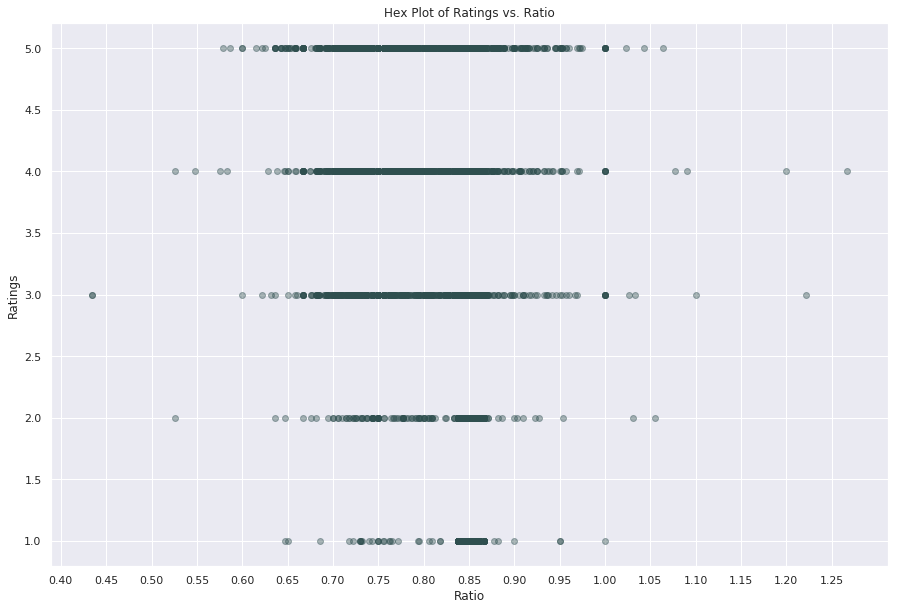

In [28]:
#plotting rating vs hip-waist ratio
figure = plt.figure(figsize=(15, 10))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(   modcloth_sub['hip_waist_ratio'],modcloth_sub['quality'],marker="o", color="darkslategray", alpha = .4)
#axes.hexbin(modcloth_sub['hip_waist_ratio'],modcloth_sub['quality'], gridsize=40, cmap=cm.Blues)
axes.set_ylabel("Ratings")
axes.set_xlabel("Ratio")
axes.set_xticks(np.arange(.4,1.3,step = .05))
axes.set_title("Hex Plot of Ratings vs. Ratio")
#plt.savefig('Rating_vs_Ratio.png')


plt.show()
plt.close()

In [29]:
#T-test that ratio affects high rating
stats.ttest_ind(mod_risk_sub.quality,low_risk_sub.quality, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=-4.350934416650137, pvalue=1.434520321599019e-05)

In [30]:
top_ratings = modcloth_sub[(modcloth_sub.length == 'just right')&(modcloth_sub.quality >=4.0)
                          &(modcloth_sub.fit == 'fit')]
top_ratings.describe()

,bra size,height,hips,item_id,quality,size,user_id,waist,hip_waist_ratio
count,31523.00000,33471.000000,22936.000000,33919.000000,33919.000000,33919.000000,33919.000000,22936.000000,22936.000000
mean,35.75935,65.075468,40.292335,461489.041157,4.569917,11.939945,499548.234028,34.141350,0.847524
std,3.16624,2.822904,5.828255,213281.285408,0.495095,7.954416,287253.726113,4.971169,0.021733
min,28.00000,36.000000,24.000000,123373.000000,4.000000,0.000000,6.000000,20.000000,0.526316
25%,34.00000,63.000000,36.000000,298256.000000,4.000000,8.000000,252224.000000,31.000000,0.842105
50%,36.00000,65.000000,39.000000,427567.000000,5.000000,10.000000,498979.000000,33.000000,0.850000
75%,38.00000,67.000000,43.000000,656172.000000,5.000000,15.000000,748031.000000,37.000000,0.857143
max,48.00000,95.000000,60.000000,807722.000000,5.000000,38.000000,999923.000000,51.000000,1.266667


In [31]:
modcloth_sub.describe()

,bra size,height,hips,item_id,quality,size,user_id,waist,hip_waist_ratio
count,76070.000000,80933.000000,55550.000000,82036.000000,81968.000000,82036.000000,82036.000000,55550.000000,55550.000000
mean,35.971079,65.142562,40.316436,469510.119204,3.949126,12.657809,498788.808755,34.162772,0.847535
std,3.223979,2.849230,5.848532,214136.368217,0.992892,8.269573,286293.903277,4.992317,0.021790
min,28.000000,36.000000,24.000000,123373.000000,1.000000,0.000000,6.000000,20.000000,0.434783
25%,34.000000,63.000000,36.000000,314980.000000,3.000000,8.000000,252931.750000,31.000000,0.843137
50%,36.000000,65.000000,39.000000,454030.000000,4.000000,12.000000,497571.000000,33.000000,0.850000
75%,38.000000,67.000000,43.000000,658440.000000,5.000000,15.000000,744574.000000,37.000000,0.857143
max,48.000000,95.000000,60.000000,807722.000000,5.000000,38.000000,999972.000000,51.000000,1.266667


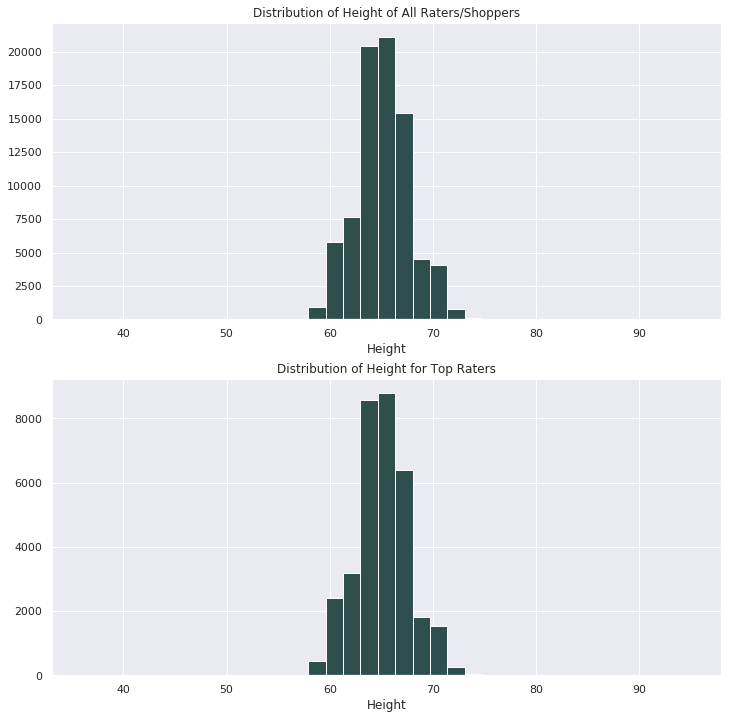

In [32]:
#Initial Height Plot
figure = plt.figure(figsize=(12, 12))

axes = figure.add_subplot(2, 1, 1)
axes.hist(modcloth_sub['height'], color="darkslategray",bins=35)
axes.set_title("Distribution of Height of All Raters/Shoppers")
axes.set_xlabel("Height")


axes = figure.add_subplot(2, 1, 2)
axes.hist(top_ratings['height'], color="darkslategray",bins=35)
axes.set_title("Distribution of Height for Top Raters")
axes.set_xlabel("Height")
#plt.savefig('Height_Comparison1.png')
plt.show()

plt.close()



In [33]:
#filling null values
top_ratings.height.fillna((top_ratings.height.mean()), inplace=True)
modcloth_sub.height.fillna((top_ratings.height.mean()), inplace=True)

In [34]:
#bootstrapping heights
top_height = fxn.bootstrap(top_ratings.height,10000,10000)
pop_height = fxn.bootstrap(modcloth_sub.height,10000,10000)

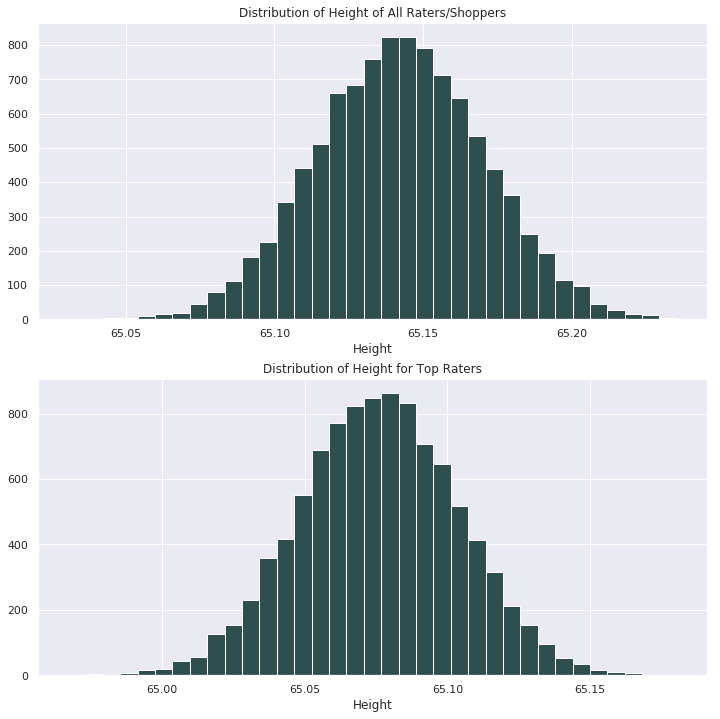

In [35]:
#Plotting bootstrapped heights
figure = plt.figure(figsize=(12, 12))



axes = figure.add_subplot(2, 1, 1)
axes.hist(pop_height, color="darkslategray",bins=35)
axes.set_title("Distribution of Height of All Raters/Shoppers")
axes.set_xlabel("Height")


axes = figure.add_subplot(2, 1, 2)
axes.hist(top_height, color="darkslategray",bins=35)
axes.set_title("Distribution of Height for Top Raters")
axes.set_xlabel("Height")
#plt.savefig('Height_Comparison.png')
plt.show()

plt.close()



In [36]:
top_sample = np.random.choice(top_height, 100, replace = False)
np.mean(top_sample)

65.07484342690688

In [37]:
pop_sample = np.random.choice(pop_height, 100, replace = False)
np.mean(pop_sample)

65.14294485937079

In [38]:
#T-test that the mean height is the same as the total population
stats.ttest_ind(top_sample,pop_sample, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=-18.002054135216817, pvalue=1.5322626862344204e-43)

In [39]:
#filling null values
top_ratings.hip_waist_ratio.fillna((top_ratings.hip_waist_ratio.mean()), inplace=True)
modcloth_sub.hip_waist_ratio.fillna((top_ratings.hip_waist_ratio.mean()), inplace=True)

In [40]:
#bootstrapping ratios
pop_ratio = fxn.bootstrap(modcloth_sub.hip_waist_ratio,10000,10000)
top_ratio = fxn.bootstrap(top_ratings.hip_waist_ratio,10000,10000)

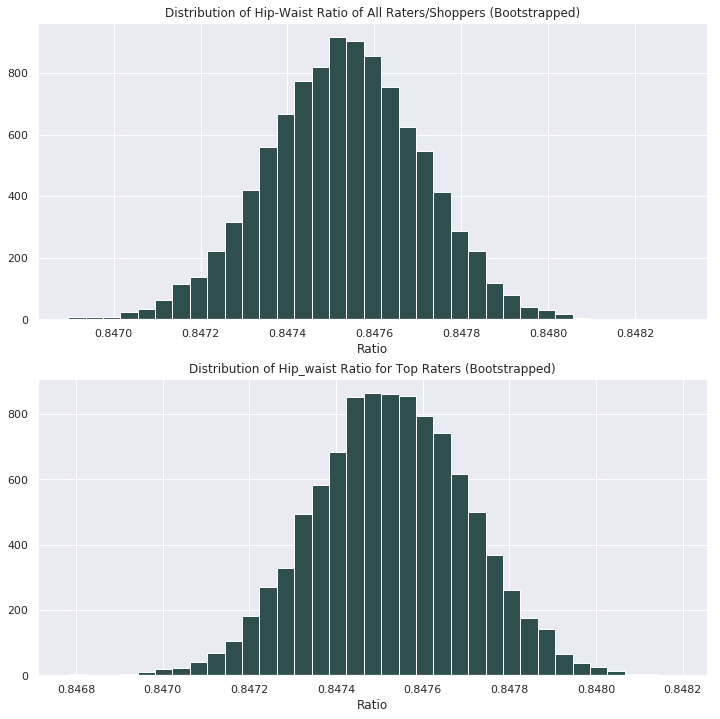

In [41]:
#Plotting bootstrapped heights
figure = plt.figure(figsize=(12, 12))



axes = figure.add_subplot(2, 1, 1)
axes.hist(pop_ratio, color="darkslategray",bins=35)
axes.set_title("Distribution of Hip-Waist Ratio of All Raters/Shoppers (Bootstrapped)")
axes.set_xlabel("Ratio")


axes = figure.add_subplot(2, 1, 2)
axes.hist(top_ratio, color="darkslategray",bins=35)
axes.set_title("Distribution of Hip_waist Ratio for Top Raters (Bootstrapped)")
axes.set_xlabel("Ratio")
plt.show()

plt.close()



In [42]:
#T-test that the mean hip to waist ratio is the same as the total population
stats.ttest_ind(pop_ratio,top_ratio, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=1.5623868205659195, pvalue=0.11821271615282909)

In [3]:
rtr_data = pd.read_csv('data/rtr_clean.csv')

In [4]:
rtr_data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
rtr_data.head()

,age,body_type,bust_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight,review_datetime,band_size,cup_size,review_text_word_count,review_summary_word_count
0,28.0,hourglass,34d,romper,fit,68.0,2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137.0,2016-04-20,34.0,d,39,3
1,36.0,straight & narrow,34b,gown,fit,66.0,153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132.0,2013-06-18,34.0,b,41,4
2,116.0,NaN,NaN,sheath,fit,64.0,1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN,2015-12-14,NaN,NaN,39,17
3,34.0,pear,34c,dress,fit,65.0,126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135.0,2014-02-12,34.0,c,83,8
4,27.0,athletic,34b,gown,fit,69.0,616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145.0,2016-09-26,34.0,b,111,7


## Sizes from the RentTheRunway site

The following categorical data is taken from [renttherunway.com](renttherunway.com) user setup page.

In [6]:
band_sizes = list(range(28, 50, 2))
cup_sizes = ['aa', 'a', 'b', 'c', 'd', 'dd', 'ddd/e', 'f', 'g', 'h', 'i', 'j']
rtr_bust_sizes = [str(band)+cup for band in band_sizes for cup in cup_sizes]
rtr_jean_sizes = list(range(24, 41))
rtr_dress_sizes = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, '24+']
rtr_body_types = ['apple', 'athletic', 'full bust', 'hourglass', 'pear', 'petite', 'straight & narrow']

## Reviewer sizes
(includes pants sizes as well, not just dress sizes)

In [7]:
rtr_data['size'].unique()

array([14, 12,  4,  8, 21,  1, 20,  2, 17, 16, 28, 36, 35, 24, 15,  5, 51,
       32, 23, 48, 45,  9, 13, 34, 39,  7, 25, 58, 26, 57, 29, 11,  0, 40,
        3, 33, 27, 43, 42, 19, 44, 54, 38, 10, 49, 52, 46,  6, 37, 22, 56,
       50, 41, 30, 55, 18], dtype=int64)

## Visualizing some of the data

We'll focus on dress data here since dresses are reviewed often and review ratings are likely to depend on garment category.

***
The following visualizations show mean dress rating grouped by size and body type. 
The vertical line on each bar are standard deviation for that category's data. 
The horizontal line is the mean rating for the given body type.

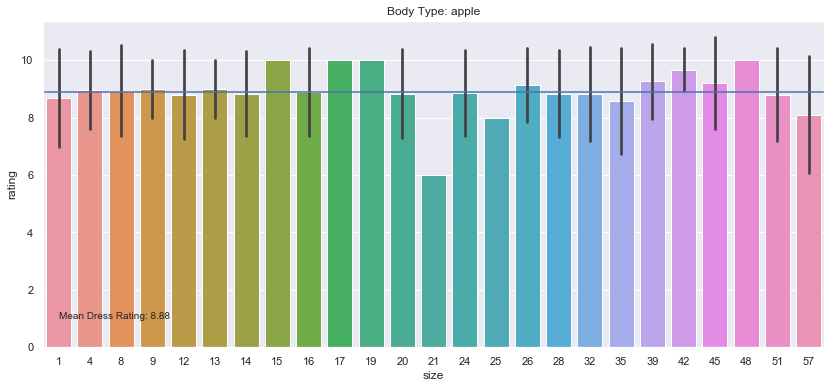

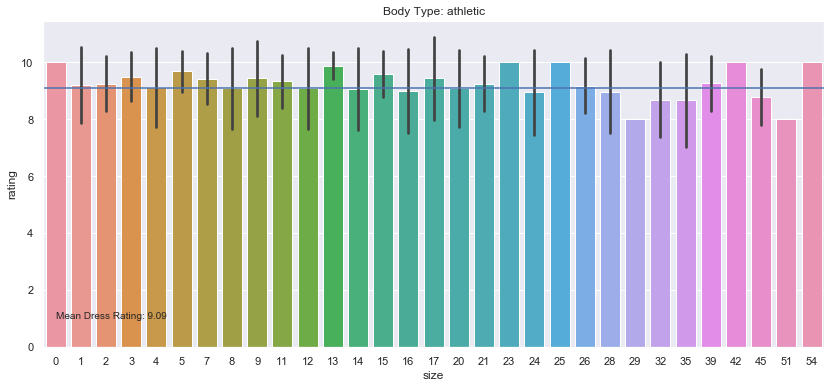

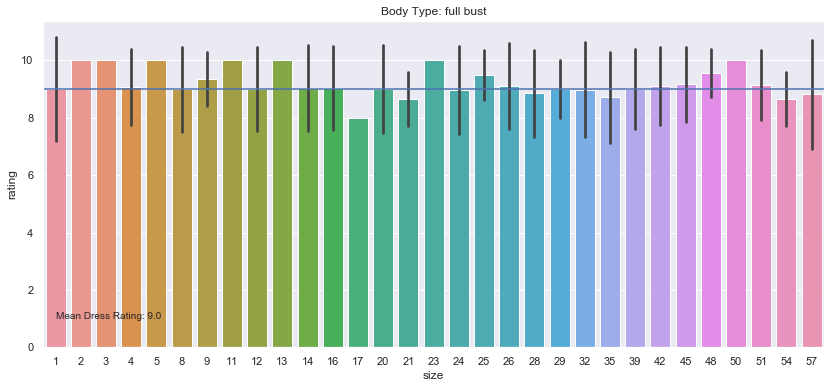

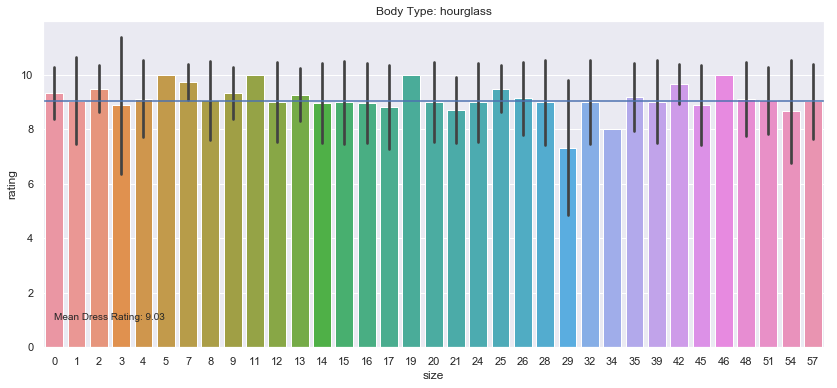

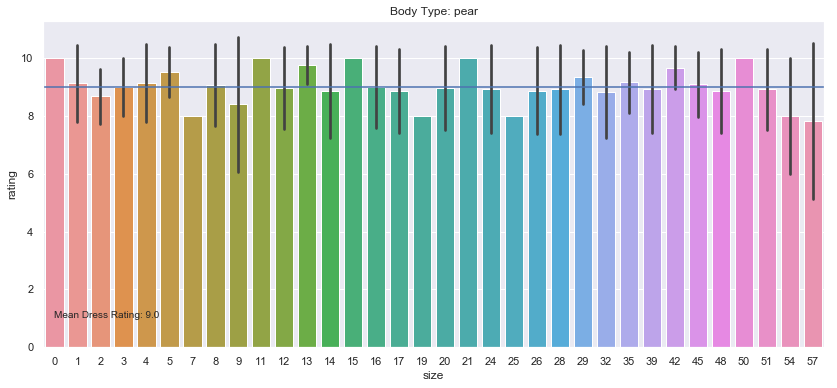

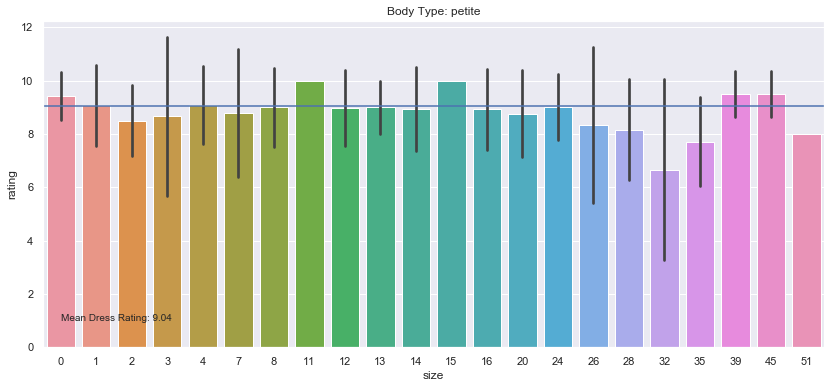

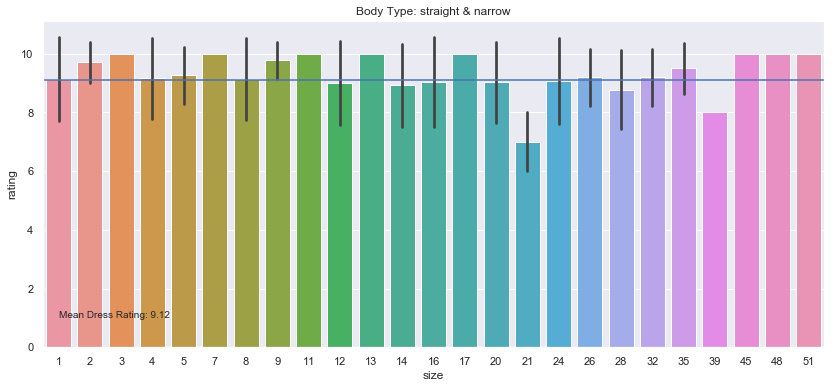

In [9]:
for bodytype in rtr_body_types:
    plt.figure(figsize=(14, 6))
    sns.barplot(x='size', 
                y='rating', 
                data=rtr_data.loc[(rtr_data.body_type==bodytype)&(rtr_data.category=='dress')], 
                ci='sd')
    plt.title('Body Type: '+bodytype)
    mean = rtr_data.loc[(rtr_data.body_type==bodytype)&(rtr_data.category=='dress')].rating.mean()
    plt.annotate('Mean Dress Rating: '+str(round(mean, 2)), (0,1))
    plt.axhline(y=mean)
    plt.show()

It is hard to identify any trends in this visualization. 
Let's move on to another visualization.
***

The following visualizations show mean dress rating grouped by cup size and body type. 
The vertical line on each bar are standard deviation for that category's data. 
The horizontal line is the mean rating for the given cup size.

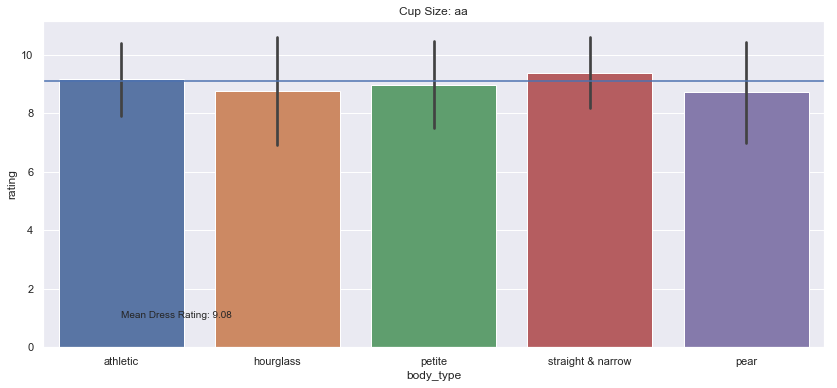

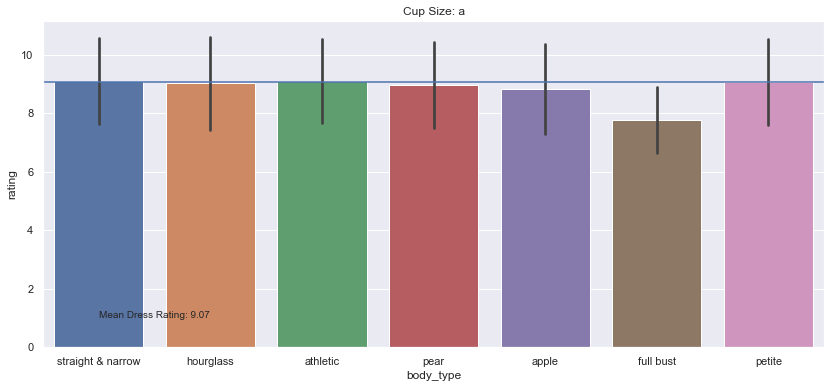

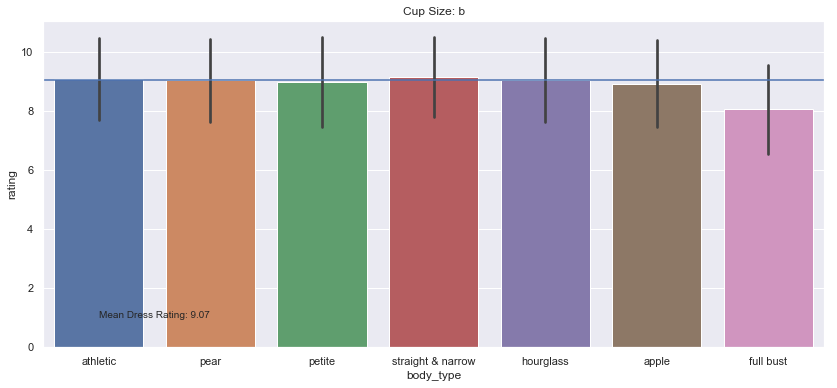

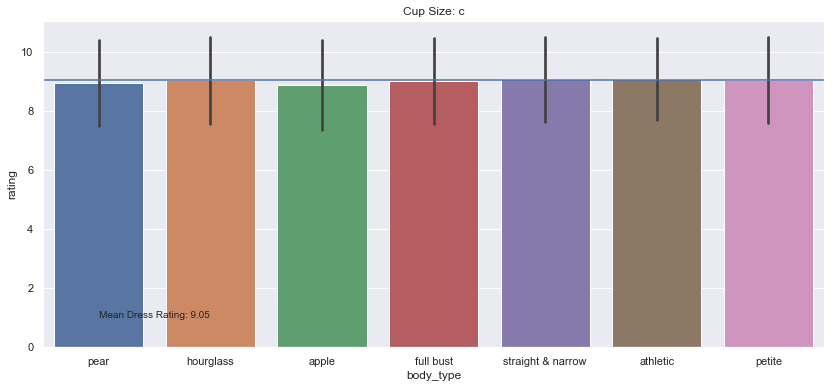

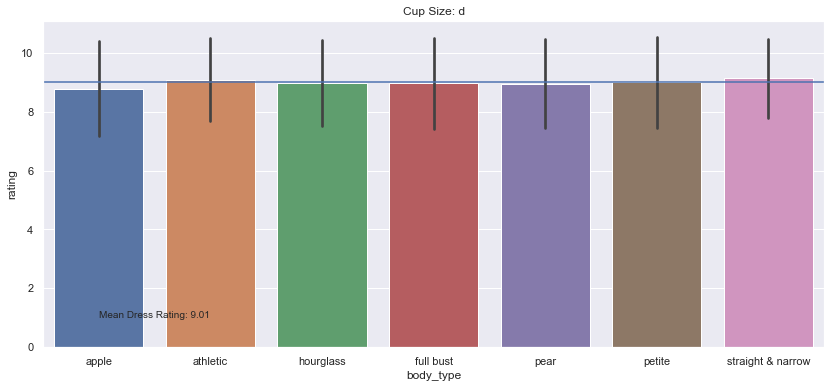

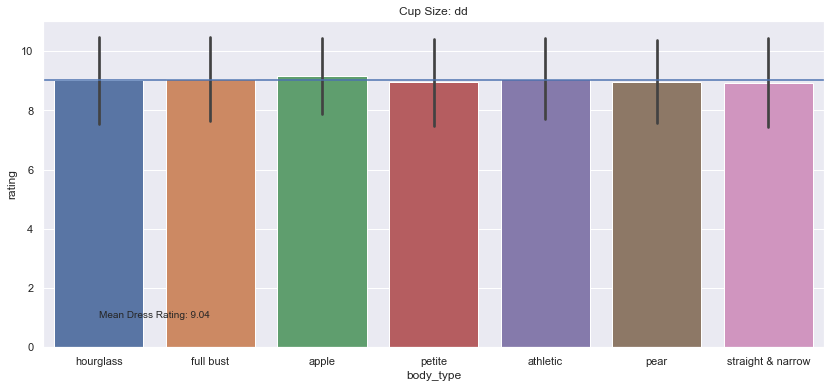

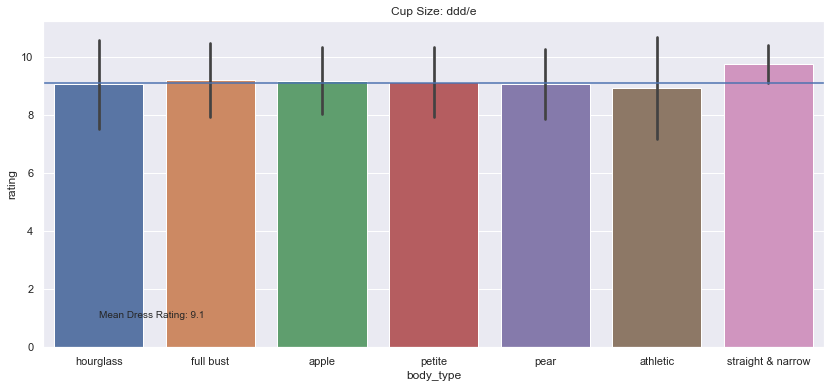

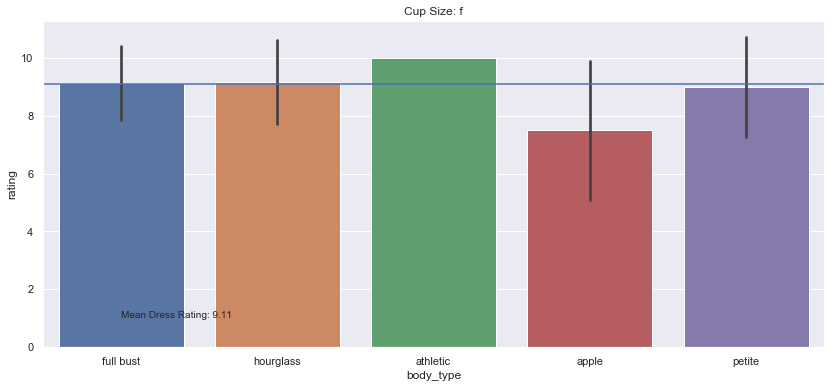

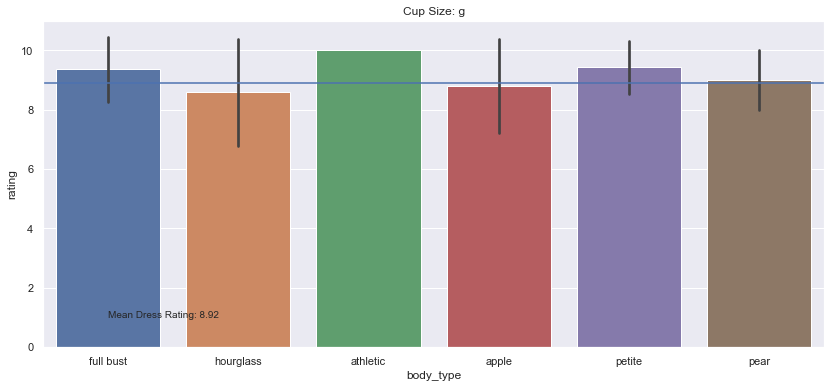

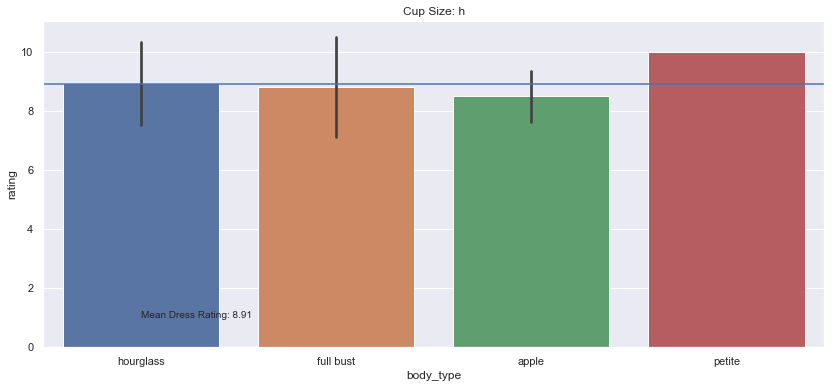

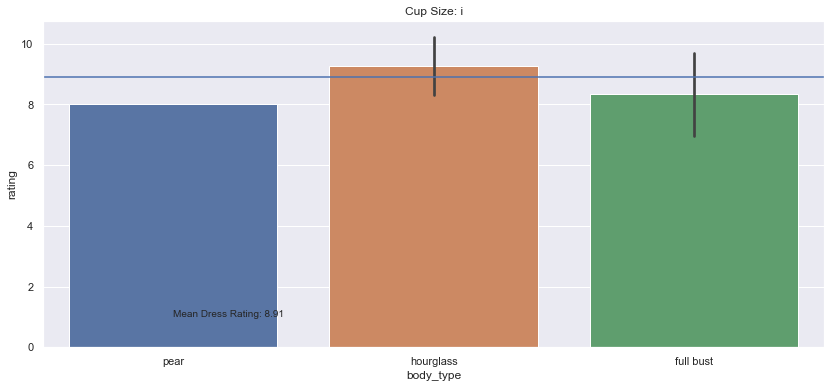

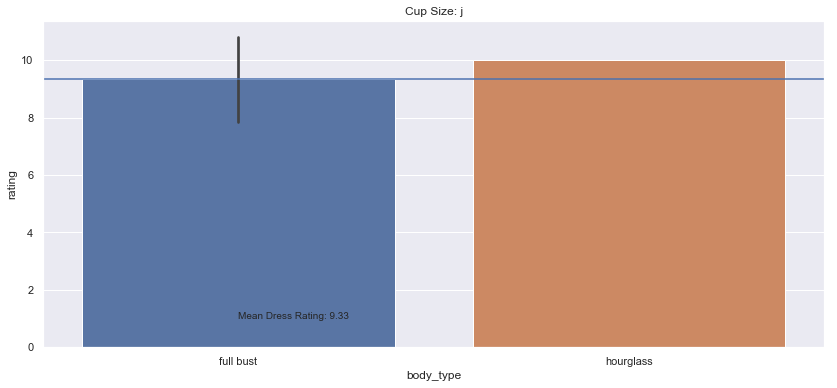

In [12]:
for cup in cup_sizes:
    plt.figure(figsize=(14, 6))
    sns.barplot(x='body_type', 
                y='rating', 
                data=rtr_data.loc[(rtr_data.cup_size==cup)&(rtr_data.category=='dress')], 
                ci='sd')
    plt.title('Cup Size: '+cup)
    mean = rtr_data.loc[(rtr_data.cup_size==cup)&(rtr_data.category=='dress')].rating.mean()
    plt.annotate('Mean Dress Rating: '+str(round(mean, 2)), (0,1))
    plt.axhline(y=mean)
    plt.show()

So if the reviewer self-described as __full bust__ and had a cup size of $b$ or smaller, then they seem more likely to rate a dress lower than average. 
In the other direction, if the reviewer self-describes as __straight & narrow__ with a cup size of $ddd/e$, then they seem more likely to rate a dress higher than average.

In [13]:
print('Number of Reviews:')
print('full bust with cup size b or smaller = ', 
      len(rtr_data.loc[((rtr_data.cup_size=='a')|(rtr_data.cup_size=='b'))&(rtr_data.category=='dress')&(rtr_data.body_type=='full bust')]), '\n'
      'straight & narrow with cup size ddd/e = ', 
      len(rtr_data.loc[(rtr_data.cup_size=='ddd/e')&(rtr_data.category=='dress')&(rtr_data.body_type=='straight & narrow')]))

Number of Reviews:
full bust with cup size b or smaller =  39 
straight & narrow with cup size ddd/e =  8


There aren't a lot of data that match the above criteria, so we'll move on to another idea.
***

### Did reviewers with different body types buy the same dresses? If so, how did ratings change?

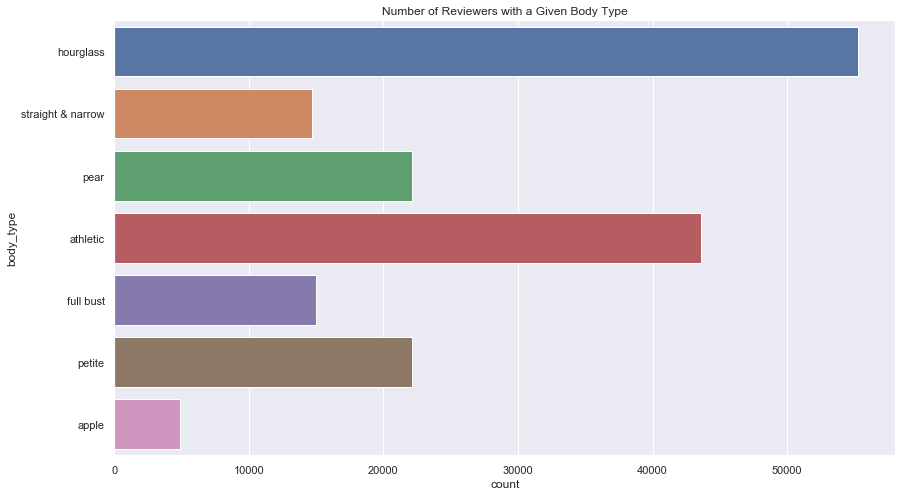

In [14]:
plt.figure(figsize=(14,8))
sns.countplot(data=rtr_data, y='body_type')
plt.title('Number of Reviewers with a Given Body Type')
plt.show()

A lot of reviewers self-describe as __hourglass__ or __athletic__, relatively few self-describe as __apple__. 
We would like to know if there are several reviews on a given dress for both __hourglass__ and __athletic__ body types.

In [15]:
print(len(rtr_data.item_id.unique()), len(rtr_data.loc[rtr_data.category=='dress'].item_id.unique()))

5850 2615


There are 5850 distinct items, 2615 of which are dresses

In [16]:
rtr_data.loc[rtr_data.category=='dress'].item_id.value_counts().head()

126335    2239
174086    1724
136110    1196
172027     984
130259     914
Name: item_id, dtype: int64

In [17]:
top_5_most_reviewed_dresses = list(rtr_data.loc[rtr_data.category=='dress'].item_id.value_counts().head().index)
top_5_most_reviewed_dresses

[126335, 174086, 136110, 172027, 130259]

In [18]:
rtr_data.dropna(axis=0, subset=['rating'], inplace=True)

In [19]:
for dress in top_5_most_reviewed_dresses:
    print(rtr_data.loc[rtr_data.item_id==dress].rating.describe())

count    2229.000000
mean        8.960072
std         1.500665
min         2.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating, dtype: float64
count    1724.000000
mean        9.013921
std         1.365283
min         2.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating, dtype: float64
count    1196.000000
mean        9.081940
std         1.360522
min         2.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating, dtype: float64
count    984.000000
mean       8.587398
std        1.683044
min        2.000000
25%        8.000000
50%        8.000000
75%       10.000000
max       10.000000
Name: rating, dtype: float64
count    913.000000
mean       8.768894
std        1.536199
min        2.000000
25%        8.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: rating, dtype: float64


The top 5 most reviewed dresses have pretty high averages. 
Lets see how their ratings are related to body type.

***
***
_Aside_:
    What are the other most often reviewed garment types?

In [20]:
top_5_most_reviewed_garments = list(rtr_data.item_id.value_counts().head().index)
top_5_most_reviewed_garments

[126335, 174086, 123793, 132738, 145906]

In [21]:
for garment in top_5_most_reviewed_garments:
    print(rtr_data.loc[rtr_data.item_id==garment].groupby('item_id').first().category)

item_id
126335    dress
Name: category, dtype: object
item_id
174086    dress
Name: category, dtype: object
item_id
123793    gown
Name: category, dtype: object
item_id
132738    gown
Name: category, dtype: object
item_id
145906    gown
Name: category, dtype: object


The other most often reviewed garment types are gowns. 
We could merge this with dress info, but for ease of understanding, we will keep this distinct and focus on garments labelled as dresses.
***
***

Now, 
### Did user's with different body types review the same dresses? If so, how did ratings change?

In [22]:
for dress in top_5_most_reviewed_dresses:
    for bodytype in rtr_body_types:
        print(f'There are {len(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type==bodytype)])} users with {bodytype} body type and who reviewed dress {dress}.')

There are 114 users with apple body type and who reviewed dress 126335.
There are 373 users with athletic body type and who reviewed dress 126335.
There are 292 users with full bust body type and who reviewed dress 126335.
There are 842 users with hourglass body type and who reviewed dress 126335.
There are 329 users with pear body type and who reviewed dress 126335.
There are 126 users with petite body type and who reviewed dress 126335.
There are 78 users with straight & narrow body type and who reviewed dress 126335.
There are 49 users with apple body type and who reviewed dress 174086.
There are 385 users with athletic body type and who reviewed dress 174086.
There are 185 users with full bust body type and who reviewed dress 174086.
There are 484 users with hourglass body type and who reviewed dress 174086.
There are 194 users with pear body type and who reviewed dress 174086.
There are 279 users with petite body type and who reviewed dress 174086.
There are 97 users with straight

Self-described body types of __athletic__ or __hourglass__ consistently have more reviews for each dress. 

Lets determine if the ratings for each body type given a particular dress are normally distributed.

In [23]:
for dress in top_5_most_reviewed_dresses:
    for bodytype in rtr_body_types:
        k2, p = stats.normaltest(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type==bodytype)].rating)
        if p>0.05:
            print(dress, bodytype, 'data are normally distributed.')

172027 pear data are normally distributed.
130259 straight & narrow data are normally distributed.


Most ratings, including those from __athletic__ and __hourglass__ body types, are not normally distributed. 
We will use resampling (bootstrapping) to create normal sampling distribtions for __athletic__ and __hourglass__ body types.

In [36]:
def resampling_func(item, bodytype, n, size):
    df = rtr_data.loc[(rtr_data.item_id==item)&(rtr_data.body_type==bodytype)]

    resamples = []
    for i in range(n):
        resamples.append(np.random.choice(df.rating, size=size))
    
    means = [resamples[i].mean() for i in range(n)]
    k2, p = stats.normaltest(means)
    if p<0.01:
        print('Increase "n" or "size" to get a distribution closer to normal')
        sns.distplot(means)
        plt.show()
        return means
    else:
        return means

We may need to run the following cell more than once until there is no comment to increase "n" or "size".

Increase "n" or "size" to get a distribution closer to normal


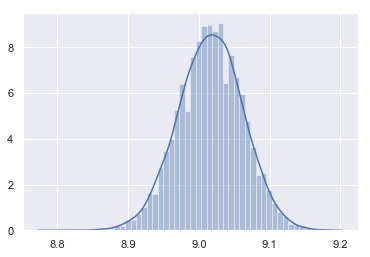

Increase "n" or "size" to get a distribution closer to normal


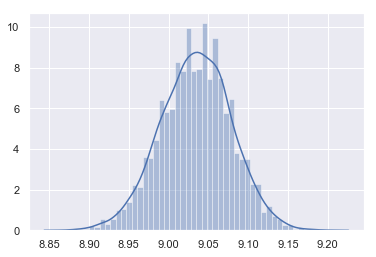

Increase "n" or "size" to get a distribution closer to normal


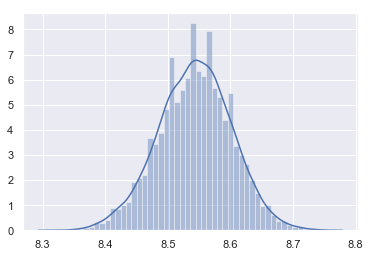

In [37]:
new_samples = {}
for dress in top_5_most_reviewed_dresses:
    for bodytype in ['athletic', 'hourglass']:
        new_samples[(dress, bodytype)] = resampling_func(dress, bodytype, 10000, 1000)

### $H_0$: For the given dress, the mean rating for reviewers with __athletic__ body type is equal to the mean rating for reviewers with __hourglass__ body type ($\alpha=0.05$).

### $H_1$: For the given dress, the mean rating for reviewers with __athletic__ body type is not equal to the mean rating for reviewers with __hourglass__ body type.

In [38]:
for dress in top_5_most_reviewed_dresses:
    athletic_samples = np.random.choice(new_samples[(dress, 'athletic')], size=100)
    hourglass_samples = np.random.choice(new_samples[(dress, 'hourglass')], size=100)
    result = stats.ttest_ind(athletic_samples, hourglass_samples, equal_var=False)
    print(dress)
    if result[1]>=0.05:
        print('We fail to reject the null hypothesis:')
        print(f'p_value {result[1]}\n')
    else:
        print('We reject the null hypothesis:')
        print(f'p_value {result[1]}\n')

126335
We reject the null hypothesis:
p_value 2.7872567998577507e-05

174086
We reject the null hypothesis:
p_value 1.6790678942280292e-20

136110
We reject the null hypothesis:
p_value 1.777465207289734e-51

172027
We fail to reject the null hypothesis:
p_value 0.16911681157899733

130259
We reject the null hypothesis:
p_value 1.1094513891788361e-33



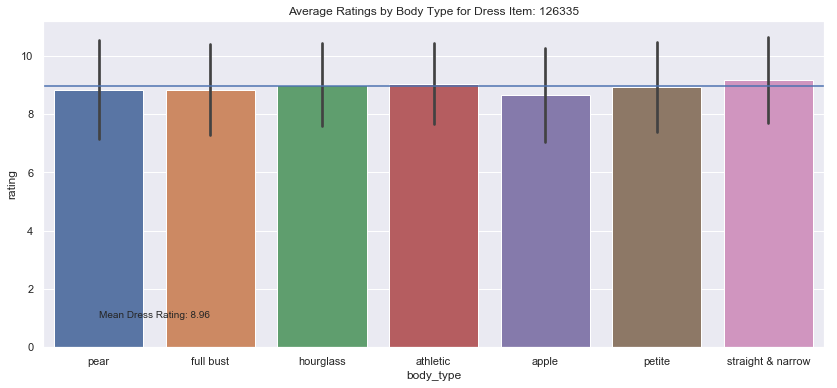

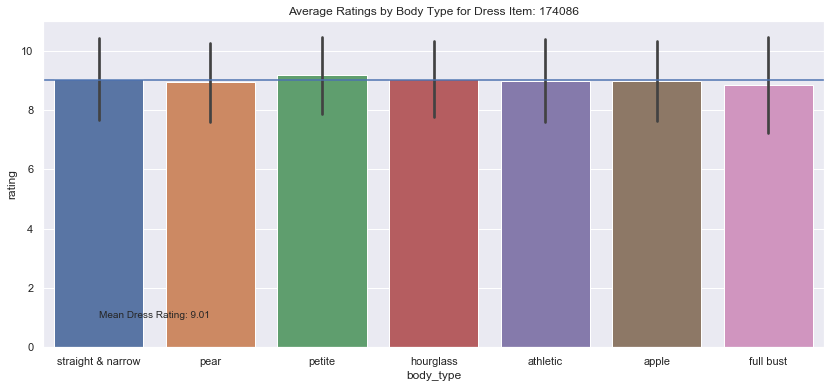

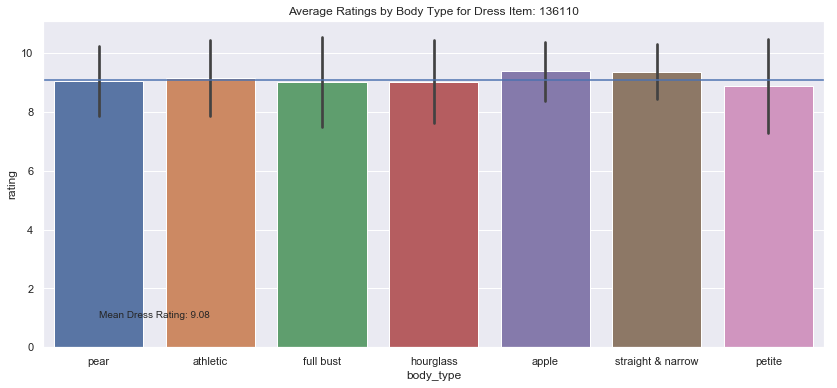

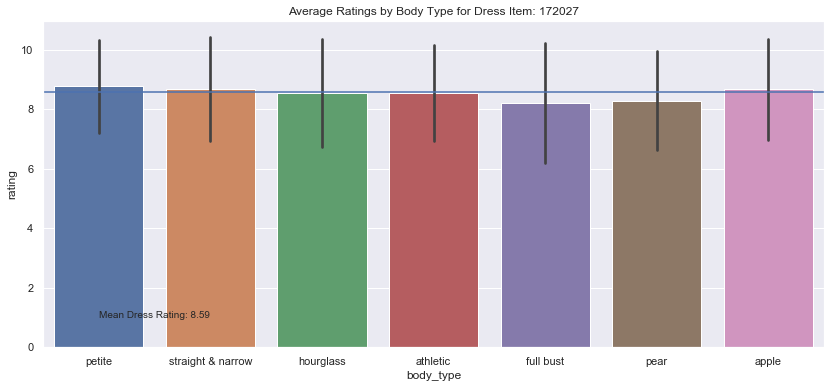

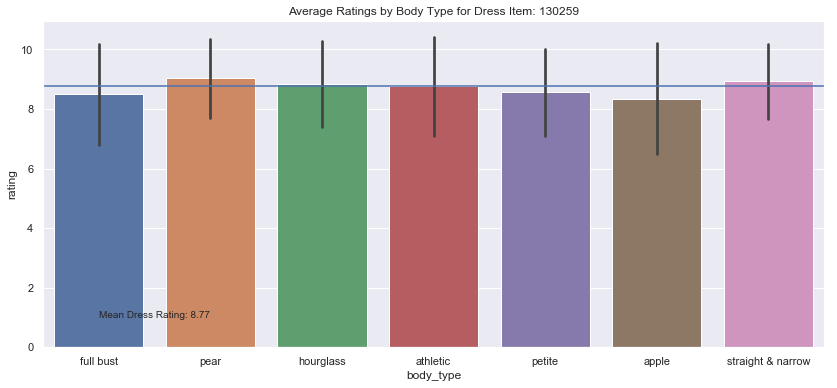

In [39]:
for dress in top_5_most_reviewed_dresses:
    plt.figure(figsize=(14, 6))
    sns.barplot(x='body_type', 
                y='rating', 
                data=rtr_data.loc[(rtr_data.item_id==dress)], 
                ci='sd')
    plt.title('Average Ratings by Body Type for Dress Item: '+str(dress))
    mean = rtr_data.loc[(rtr_data.item_id==dress)].rating.mean()
    plt.annotate('Mean Dress Rating: '+str(round(mean, 2)), (0,1))
    plt.axhline(y=mean)
    plt.show()

In [40]:
top_5_most_reviewed_dresses

[126335, 174086, 136110, 172027, 130259]

Below, we calculate an effect size for the difference between __athletic__ and __hourglass__ body type ratings.

In [41]:
def calc_cohens_d(dress):
    return (rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type.isin(['athletic']))].rating.mean()-rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type.isin(['hourglass']))].rating.mean())/rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type.isin(['athletic', 'hourglass']))].rating.std()

for dress in top_5_most_reviewed_dresses:
    print(dress, calc_cohens_d(dress))

126335 0.0165891784260378
174086 -0.03986442726209547
136110 0.09557701615454876
172027 -0.004395699558372747
130259 -0.058573390265457013


So there is sufficient evidence to reject the null hypothesis in each of the above 5 hypothesis tests, but the effect size is very small.
***

### Proportions Tests

It looks like there are some differences in the average means given body type depending on the dress. 
If there are enough values in each of these categories, we would like to use a two sample $t$ test to compare the highest and lowest average ratings given body type.

Unfortunately, not all of the samples have a large $n$. 
In fact, some have a downright small $n$. 
Recall, 
- There are 26 users with straight & narrow body type and who reviewed dress 130259.
- There are 12 users with apple body type and who reviewed dress 172027.
    
We'll run a proportions test on rating higher than 8 instead!

For each sample we'll need to check that $n\cdot p>5$ and $n\cdot (1-p)>5$ for all samples involved.

In [42]:
for dress in top_5_most_reviewed_dresses:
    for bodytype in rtr_body_types:
        n = len(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type==bodytype)])
        p = len(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type==bodytype)&(rtr_data.rating>8)])/n
        if n*p<=5 or n*(1-p)<=5:
            print(f'Users with {bodytype} body type who reviewed dress {dress}: np={n*p}, n(1-p)={n*(1-p)}.')

So each sample satisfies hypotheses required to compare with a proportions test!
Let's compare the highest and lowest proportion of higher than 8 average rating for each dress.

In [44]:
extreme_ratings_proportions = {}
for dress in top_5_most_reviewed_dresses:
    ratings = []
    for bodytype in rtr_body_types:
        n = len(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type==bodytype)])
        x = len(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.body_type==bodytype)&(rtr_data.rating>8)])
        p = x/n
        ratings.append({'body_type':bodytype, 'x':x, 'n':n, 'p':p})
    ratings = sorted(ratings, key=lambda rating: rating['p'])
    total_n = len(rtr_data.loc[(rtr_data.item_id==dress)])
    total_p = len(rtr_data.loc[(rtr_data.item_id==dress)&(rtr_data.rating>8)])/total_n 
    extreme_ratings_proportions[dress] = (total_p, ratings[0], ratings[-1])

The following hypotheses are examples of the proportions test we will run. 
Each test will have a slightly different alternative hypothesis.

### $H_0$: Given a dress, the proportion of ratings over 8 for body type x is equal to the proportion of reviews over 8 overall ($\alpha=0.05$).

### $H_1$: Given a dress, the proportion of ratings over 8 for body type x is grater than the proportion of reviews over 8 overall.

In [45]:
for dress in top_5_most_reviewed_dresses:
    p = extreme_ratings_proportions[dress][0]
    
    # Binomial test that the least proportions is statiscally lower than the population proportion
    x = extreme_ratings_proportions[dress][1]['x']
    n = extreme_ratings_proportions[dress][1]['n']
    body_type = extreme_ratings_proportions[dress][1]['body_type']
    p_value = stats.binom_test(x=x, n=n, p=p, alternative='less')
    if p_value>=0.05:
        print('We fail to reject the null hypothesis:')
        print(f'The proportion of body type {body_type} rating dress {dress} less than average.\n    p_value {p_value}\n')
    else:
        print('We reject the null hypothesis:')
        print(f'Alternative hypothesis: The proportion of body type {body_type} rating dress {dress} less than average.\n    p_value {p_value}\n')
    
    # Binomial test that the least proportions is statiscally lower than the population proportion
    x = extreme_ratings_proportions[dress][2]['x']
    n = extreme_ratings_proportions[dress][2]['n']
    body_type = extreme_ratings_proportions[dress][2]['body_type']
    p_value = stats.binom_test(x=x, n=n, p=p, alternative='greater')
    if p_value>=0.05:
        print('We fail to reject the null hypothesis:')
        print(f'The proportion of body type {body_type} rating dress {dress} greater than average.\n    p_value {p_value}\n')
    else:
        print('We reject the null hypothesis:')
        print(f'Alternative hypothesis: The proportion of body type {body_type} rating dress {dress} greater than average.\n    p_value {p_value}\n')

We reject the null hypothesis:
Alternative hypothesis: The proportion of body type apple rating dress 126335 less than average.
    p_value 0.01247973105667982

We fail to reject the null hypothesis:
The proportion of body type straight & narrow rating dress 126335 greater than average.
    p_value 0.05780285778346853

We fail to reject the null hypothesis:
The proportion of body type pear rating dress 174086 less than average.
    p_value 0.12599680553470252

We reject the null hypothesis:
Alternative hypothesis: The proportion of body type petite rating dress 174086 greater than average.
    p_value 0.015179002157341324

We fail to reject the null hypothesis:
The proportion of body type pear rating dress 136110 less than average.
    p_value 0.10872895175963643

We fail to reject the null hypothesis:
The proportion of body type apple rating dress 136110 greater than average.
    p_value 0.1187578766010133

We fail to reject the null hypothesis:
The proportion of body type full bust r

In [46]:
rtr_data['high_rating'] = rtr_data.rating.apply(lambda x: x>8)

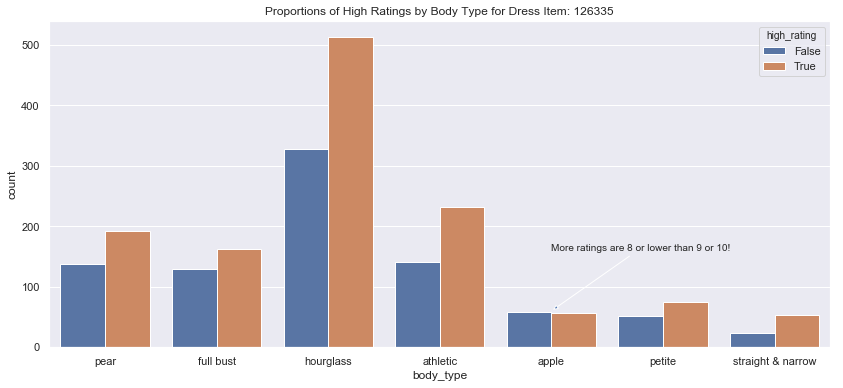

In [47]:
plt.figure(figsize=(14, 6))
sns.countplot(x='body_type', 
              data=rtr_data.loc[(rtr_data.item_id==126335)], 
              hue='high_rating')
plt.title('Proportions of High Ratings by Body Type for Dress Item: '+str(126335))
plt.annotate('More ratings are 8 or lower than 9 or 10!', 
             xy=(4,60), 
             xytext=(4,160), 
             arrowprops={'arrowstyle':'-|>'})
#plt.savefig('dress_126335_high_ratings_proportions')
plt.show()

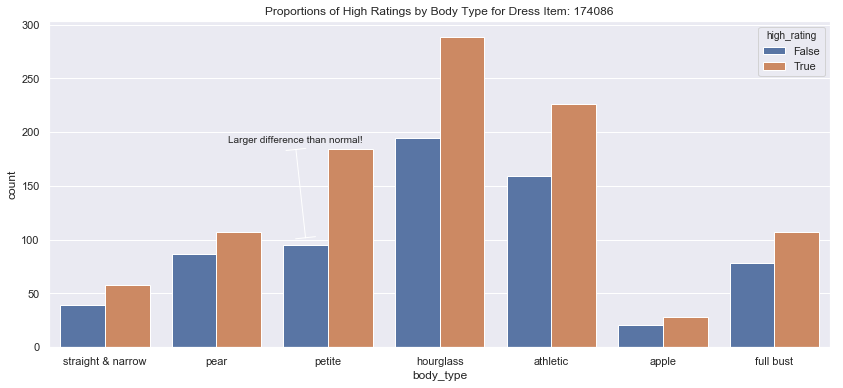

In [48]:
plt.figure(figsize=(14, 6))
sns.countplot(x='body_type', 
              data=rtr_data.loc[(rtr_data.item_id==174086)], 
              hue='high_rating')
plt.title('Proportions of High Ratings by Body Type for Dress Item: '+str(174086))
plt.annotate('Larger difference than normal!', 
             xy=(1.8,100), 
             xytext=(1.1,190), 
             arrowprops={'arrowstyle':'|-|'})
#plt.savefig('dress_174086_high_ratings_proportions')
plt.show()

***
***
***
# Some questions that have yet to be explored in the data

## Did a reviewer's body change over time? If so, did their reviews change as well?

In [49]:
rtr_users = rtr_data.groupby('user_id').count()

changed_users = []
for user in list(rtr_users.loc[rtr_users.review_date>1].index.values):
    total = len(rtr_data.loc[rtr_data.user_id==user])
    same = rtr_data.loc[rtr_data.user_id==user].duplicated(['bust_size', 'size', 'height'], keep=False).sum()
    if total-same>0:
        changed_users.append((user, total-same))

len(changed_users)

22977

So 22977 reviewers changed something about their body over time.

Testing reviews on specific types of garments across reviewers as their body sizes and shapes change reduces variability in the ratings metric. 
For example, maybe two different reviewers may have different feelings towards tea length dresses and therefore will rate them differently despite their sizing/fit. 
It is more likely (though not always true!) that one reviewers's feelings towards tea length dresses will remain the same over time, but their rating of that style of dress may change with their body.

***
## Is there a relationship between self-described body type and self-described body measurements?

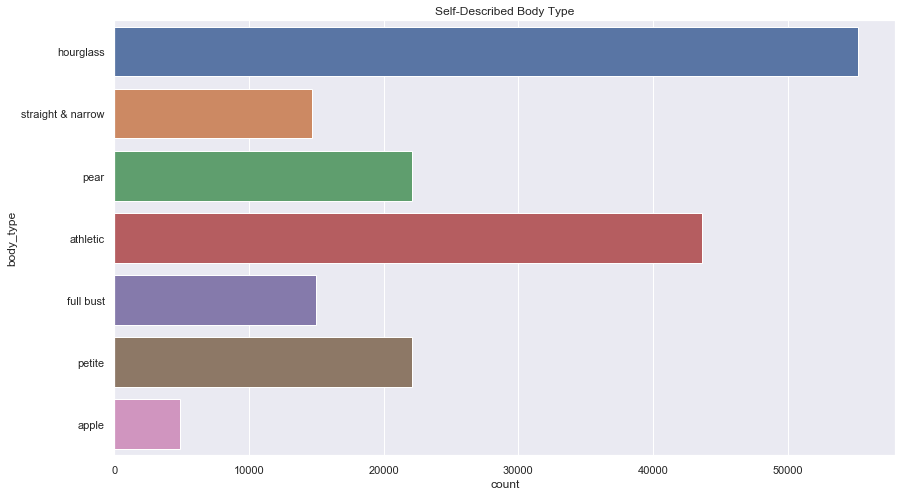

In [50]:
plt.figure(figsize=(14,8))
sns.countplot(data=rtr_data, y='body_type')
plt.title('Self-Described Body Type')
plt.show()

Looks like a lot of reviewers self-describe as hourglass. 
We don't have waist or hip measurements in this data, but we do have ```band_size```, ```cup```, and ```weight```... maybe we can see if there is a relationship between these (again self-describd) variables and the ```body_type```.

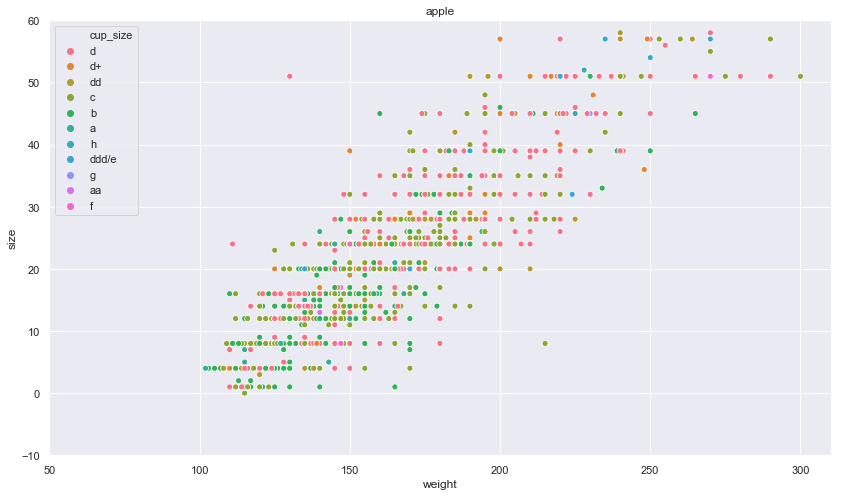

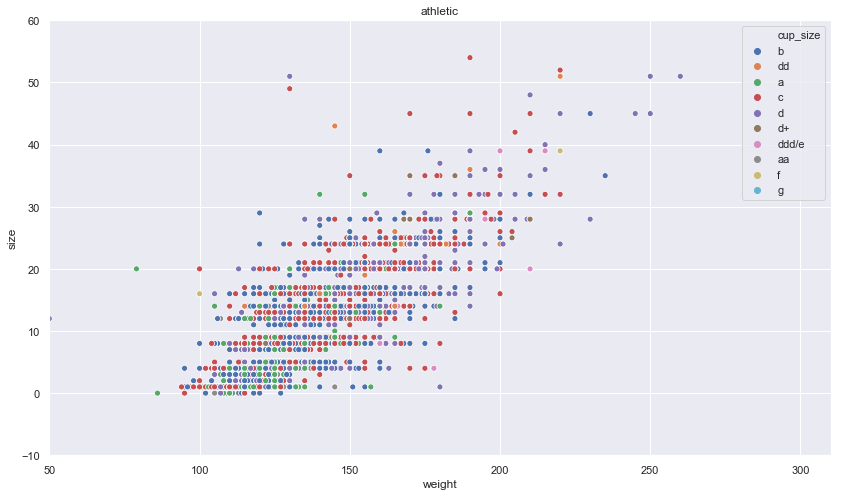

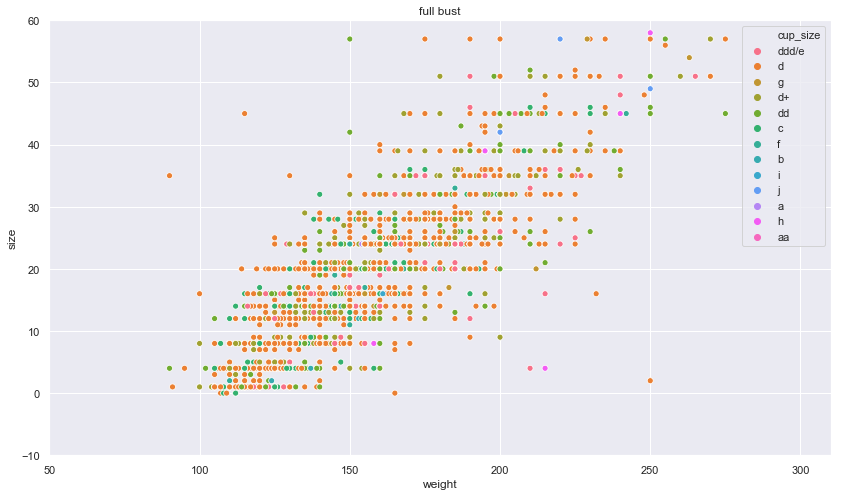

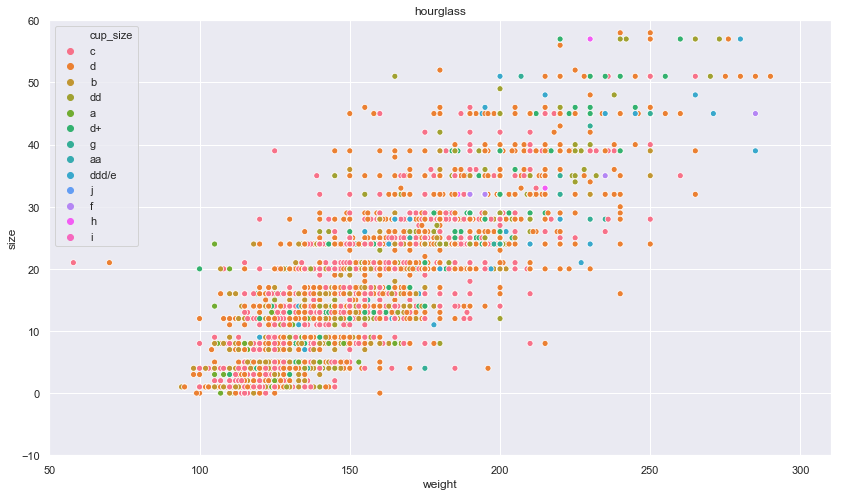

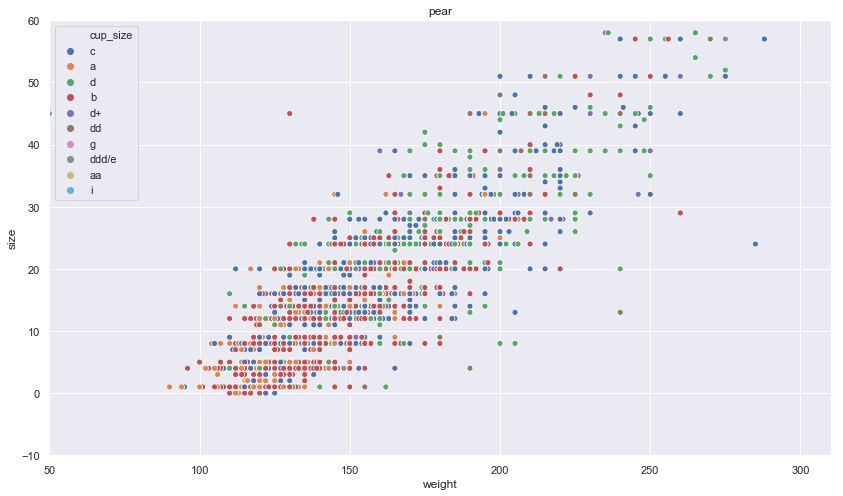

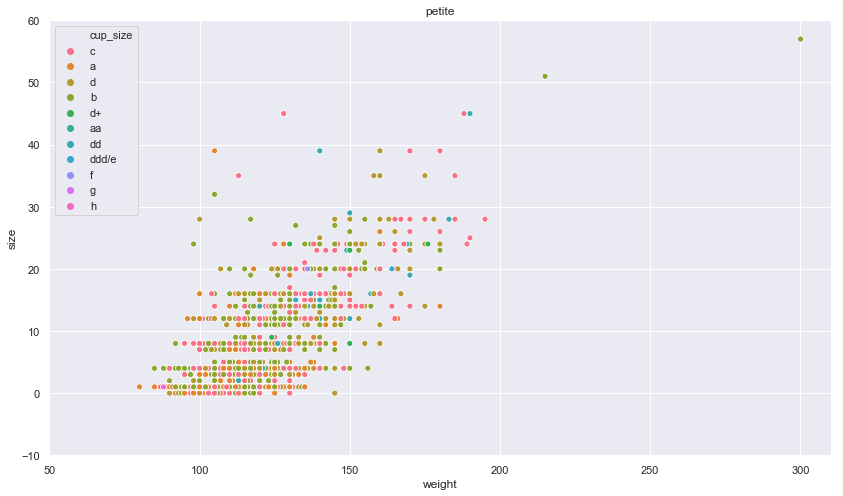

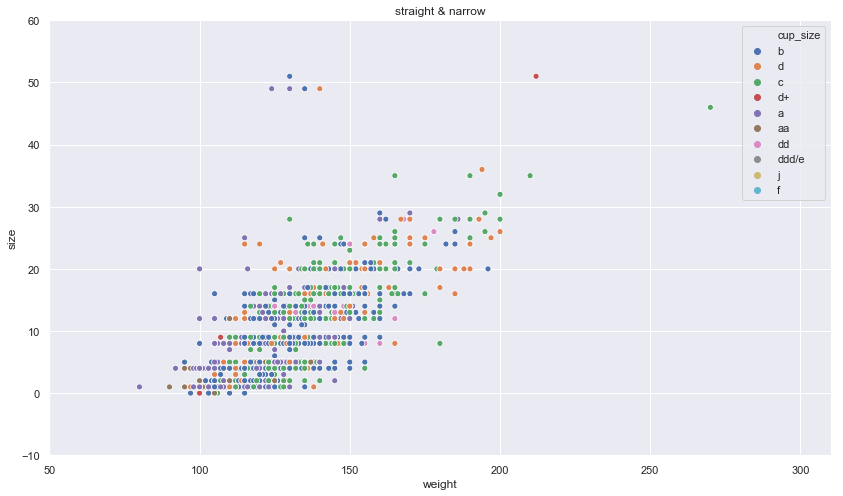

In [51]:
for bodytype in rtr_body_types:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='weight', y='size', hue='cup_size', legend='brief', data=rtr_data.loc[rtr_data.body_type==bodytype].groupby('user_id').first())
    plt.title(bodytype)
    plt.xlim(50,310)
    plt.ylim(-10,60)
    plt.show()

There appear to be differences in weight to size trends for different self-described body types. 
What trends are significantly different, and is there a natural partition in a given dimension or dimensions for certain body types?